# 0. Setup

### Import packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
# order_products_train = pd.read_csv('order_products__train.csv') # to be used later

In [3]:
dataset = {'aisles' : aisles, 'departments' : departments, 'orders' : orders, 'products' : products, 'order_product_prior' : order_products_prior}

# 1. Exploratory analysis

Datasets : An anonymized dataset containing a sample of over 3 million grocery orders from more than 200 000 instacart users, published in 2017. Between 4 and 100 of orders are provided per user, with sequence of products purchased in each order.  

In [4]:
# Overview
df_shapes = pd.DataFrame(columns = ['Dataset', 'Row count', 'Col count','Total null count'])
for n, d in dataset.items():
    df_shapes.loc[len(df_shapes)] = [n, d.shape[0], d.shape[1], d.isna().sum().sum()]
df_shapes

,Dataset,Row count,Col count,Total null count
0,aisles,134,2,0
1,departments,21,2,0
2,orders,3421083,7,206209
3,products,49688,4,0
4,order_product_prior,32434489,4,0


### `aisles` table

Columns
- aisle_id : unique id
- aisle

In [5]:
# A look at the aisle table
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### `departments` table

Columns
- department_id : unique id
- department

In [6]:
# A look at the departments table
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### `orders` table

Columns
- order_id : unique id
- user_id
- eval_set : divided the data into 'prior', 'eval', 'train'. Only the last order of a user is categorized as 'eval' or 'train'. 
- order_number : order number of the user
- order_dow : day of week
- order_hour_of_day
- days_since_prior_order


In [7]:
# A look at the orders table
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
# Examine statistics of numerical columns
pd.options.display.float_format = '{:.0f}'.format
orders.drop(columns=['order_id','user_id']).describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083,3421083,3421083,3214874
mean,17,3,13,11
std,18,2,4,9
min,1,0,0,0
25%,5,1,10,4
50%,11,3,13,7
75%,23,5,16,15
max,100,6,23,30


In [9]:
# Identify number of null values
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
# Verify if null values in days_since_prior_order are due to first purchases per person
orders.isna().sum().sum() == len(orders.user_id.unique())

True

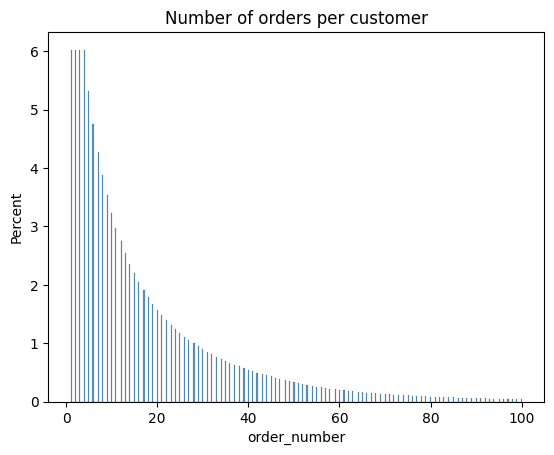

In [11]:
# Display order numbers per customer


fig = plt.figure()

sns.histplot(data = orders,
             x = 'order_number',
             stat = 'percent')
plt.title('Number of orders per customer') ;

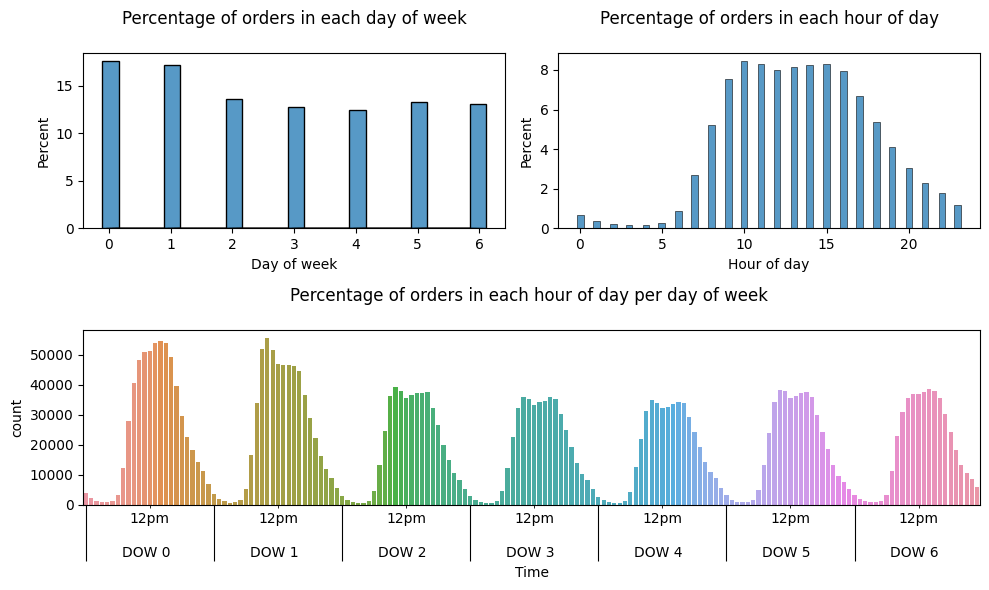

In [12]:
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

fig = plt.figure(figsize=(10,6))

# ax1 : Percentage of orders in each day of week
ax1 = fig.add_subplot(2,2,1)
sns.histplot(data= orders,
             x = 'order_dow',
             shrink = 5,
             stat = 'percent',
             ax = ax1)
ax1.set_title('Percentage of orders in each day of week\n')
ax1.set_xlabel('Day of week')

# ax2 : Percentage of orders in each hour of day
ax2 = fig.add_subplot(2,2,2)
sns.histplot(data= orders,
             x = 'order_hour_of_day',
             shrink = 5,
             stat = 'percent',
             ax = ax2)
ax2.set_title('Percentage of orders in each hour of day\n')
ax2.set_xlabel('Hour of day')

#ax3 : Percentage of orders in each hour of day per day of week

order_grouped = orders.groupby(['order_dow','order_hour_of_day']).count()['order_id'].reset_index(name = 'count')

ax3 = fig.add_subplot(2,1,2)
sns.barplot(data = order_grouped,
             y= 'count',
             x = order_grouped.index,
             ax = ax3)


ax3.xaxis.set_minor_locator(ticker.MultipleLocator(12))
ax3.xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, pos: f'12pm' if x % 6 == 0 else ''))

ax3.xaxis.set_major_locator(ticker.MultipleLocator(24))
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'DOW {int(x/24)}'))
ax3.xaxis.set_tick_params(which='major', pad=-10, length=40)

offset = ScaledTranslation(0.6, 0, fig.dpi_scale_trans)
for label in ax3.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

ax3.set_title('Percentage of orders in each hour of day per day of week \n')
ax3.set_xlabel('Time')

plt.tight_layout()


### products

Columns
- product_id : unique id
- product_name
- aisle_id
- department_id

In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<AxesSubplot:xlabel='department'>

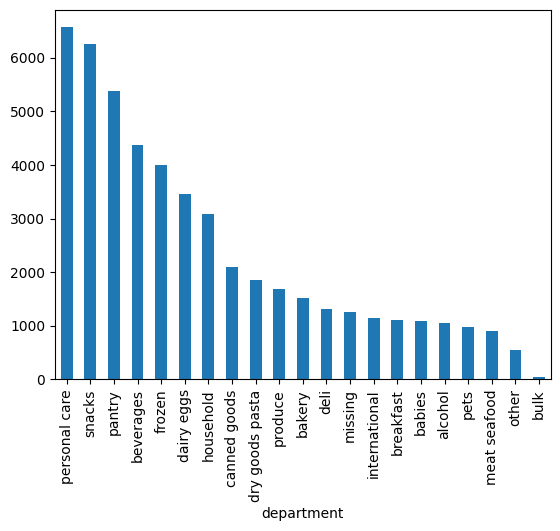

In [14]:
# Distribution of the products per department
product_grouped = products.groupby(['department_id'], as_index=False).agg(count = ('product_id','count'))
product_grouped = product_grouped.join(departments.set_index('department_id'), on = 'department_id')
product_grouped.set_index('department')['count'].sort_values(ascending = False).plot(kind = 'bar')

### order_products_prior 

Columns
- order_id : unique id
- product_id
- add_to_cart_order : order of the product_id added to the cart by the customer for a given order_id
- reordered : Was the product ordered before?

In [15]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
# Which products are frequently reordered?
reorders = order_products_prior.groupby(['product_id'], as_index=False)\
                    .agg(total = ('reordered','count'), reordered = ('reordered','sum')) \
                    .merge(products, on = 'product_id', how = 'left')\
                    .set_index('product_name')[['total','reordered']]

reorders['ordered_once'] = reorders['total']-reorders['reordered']
reorders['perc'] = reorders['reordered'] / reorders['total']*100
reorders_30 = reorders.loc[reorders['reordered'] != 0].sort_values(by = 'total', ascending = False).head(30)


In [17]:
reorders_30.reset_index()

,product_name,total,reordered,ordered_once,perc
0,Banana,472565,398609,73956,84
1,Bag of Organic Bananas,379450,315913,63537,83
2,Organic Strawberries,264683,205845,58838,78
3,Organic Baby Spinach,241921,186884,55037,77
4,Organic Hass Avocado,213584,170131,43453,80
5,Organic Avocado,176815,134044,42771,76
6,Large Lemon,152657,106255,46402,70
7,Strawberries,142951,99802,43149,70
8,Limes,140627,95768,44859,68
9,Organic Whole Milk,137905,114510,23395,83


<AxesSubplot:title={'center':'Top 30 reordered products'}, xlabel='product_name'>

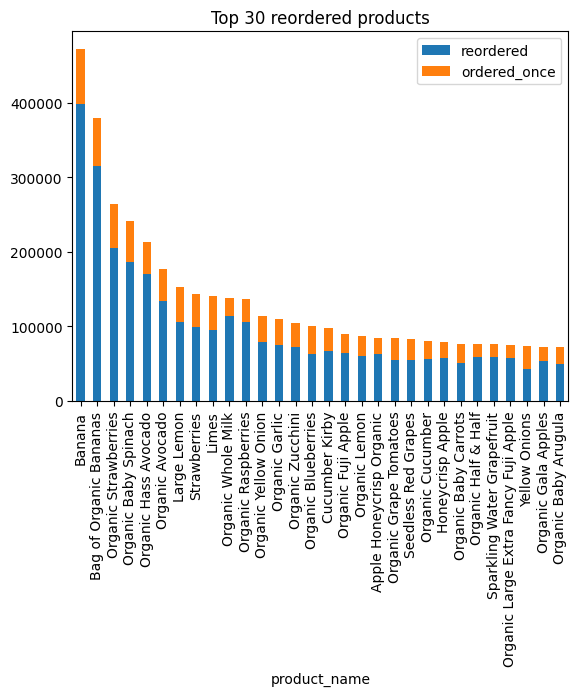

In [18]:
reorders_30.reset_index()[['product_name','reordered','ordered_once']].plot(x = 'product_name', kind = 'bar', stacked = True, title = "Top 30 reordered products")

Most of reordered products are fresh produces 

# 2. Data merge

Merge tables into one table to use for analysis

In [19]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [20]:
# Omitting aisles and departments for now as they contain labels of data
transactions = order_products_prior.merge(orders, on = 'order_id', how = 'left')
transactions = transactions.merge(products.drop(columns = 'product_name'), on = 'product_id', how = 'left')
transactions.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8,86,16
1,2,28985,2,1,202279,prior,3,5,9,8,83,4
2,2,9327,3,0,202279,prior,3,5,9,8,104,13
3,2,45918,4,1,202279,prior,3,5,9,8,19,13
4,2,30035,5,0,202279,prior,3,5,9,8,17,13


In [21]:
transactions.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
aisle_id                        0
department_id                   0
dtype: int64

In [22]:
# Delete orders with no details
transactions

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8,86,16
1,2,28985,2,1,202279,prior,3,5,9,8,83,4
2,2,9327,3,0,202279,prior,3,5,9,8,104,13
3,2,45918,4,1,202279,prior,3,5,9,8,19,13
4,2,30035,5,0,202279,prior,3,5,9,8,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21,74,17
32434485,3421083,11352,7,0,25247,prior,24,2,6,21,78,19
32434486,3421083,4600,8,0,25247,prior,24,2,6,21,52,1
32434487,3421083,24852,9,1,25247,prior,24,2,6,21,24,4


In [23]:
# Before looking at order combination, examine orders with a single product

# Identifying purchases with only one item
order_product = transactions.groupby(['order_id']).agg(product_count = ('product_id','count'))
transactions = transactions.merge(order_product, on = 'order_id', how = 'left')

transactions_single = transactions.loc[transactions['product_count'] == 1]
transactions_multiple = transactions.loc[transactions['product_count'] > 1]


Text(0.5, 1.0, 'Top 20 Single purchase products')

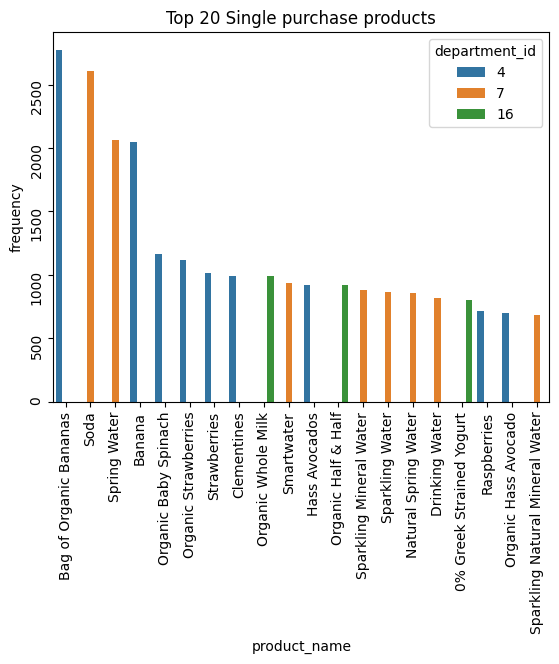

In [24]:
temp = pd.DataFrame(transactions_single['product_id'].value_counts().reset_index())
temp.columns = ['product_id','frequency']
temp = temp.merge(products, on = 'product_id', how = 'left')
t = temp[:20]
t
sns.barplot(data = t, x = 'product_name', y = 'frequency', order = t.product_name, hue = 'department_id')
plt.tick_params(rotation = 90)
plt.title('Top 20 Single purchase products')

# 3. Market Basket Analysis 
using mlxtend, as apriori outdated

In [25]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [ ]:
# Using product names for easier identification
purchases = transactions_multiple[['order_id','product_id']].merge(products[['product_id','product_name']], on = 'product_id', how = 'left')
purchases = purchases.groupby('order_id')['product_name'].apply(list).reset_index().dropna().rename(columns={'product_name':'purchase_list'})
purchases

,order_id,purchase_list
0,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
1,3,[Total 2% with Strawberry Lowfat Greek Straine...
2,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
3,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
4,6,"[Cleanse, Dryer Sheets Geranium Scent, Clean D..."
...,...,...
3058121,3421078,"[Organic Gala Apples, Banana, Gluten Free Pean..."
3058122,3421080,"[Organic Whole Milk, Vanilla Bean Ice Cream, O..."
3058123,3421081,"[Hint of Lime Flavored Tortilla Chips, Classic..."
3058124,3421082,"[Fresh 99% Lean Ground Turkey, Original Spray,..."


In [27]:
a

NameError: name 'a' is not defined

In [ ]:
# # Storing list of products purchased per order
# purchases = transactions_multiple.groupby('order_id')['product_id'].apply(list).reset_index().dropna().rename(columns={'product_id':'purchase_list'})
# purchases.shape

KeyboardInterrupt: 

In [29]:
purchases.head(20)

,order_id,purchase_list
0,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
1,3,[Total 2% with Strawberry Lowfat Greek Straine...
2,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
3,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
4,6,"[Cleanse, Dryer Sheets Geranium Scent, Clean D..."
5,7,"[Orange Juice, Pineapple Chunks]"
6,9,"[Organic Red Radish, Bunch, Whole White Mushro..."
7,10,"[Banana, Baby Portabella Mushrooms, Organic Ci..."
8,11,"[Teriyaki & Pineapple Chicken Meatballs, Mango..."
9,12,"[French Vanilla Coffee Creamer, 2% Milk, Cheru..."


- Support : minimum threshold for appearance of the item the analysis
- Confidence : how often on the right side of the rule appear in transactions that contain the items on the left side of the rule
(Bayesian P(Y|X))
- Lift : how much more often the items A and B occur together than expected if they were statistically independent

In [33]:
# Apriori preparation
rules_data = purchases.purchase_list.tolist()
for i in range(len(rules_data)):
    rules_data[i] = list(map(str,rules_data[i]))

In [ ]:
# Do a comparison on apyori, mlxtend.apriori, fim

In [ ]:
# Apyori
from apyori import apriori
results = list(apriori(rules_data[:70000]))
results

[RelationRecord(items=frozenset({'13176'}), support=0.12491428571428571, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'13176'}), confidence=0.12491428571428571, lift=1.0)]),
 RelationRecord(items=frozenset({'24852'}), support=0.15601428571428572, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'24852'}), confidence=0.15601428571428572, lift=1.0)])]

In [ ]:
#mlxtend
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(rules_data).transform(rules_data)
df= pd.DataFrame(te_ary, columns = te.columns_)

df

MemoryError: Unable to allocate 141. GiB for an array with shape (3058126, 49674) and data type bool

In [ ]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.1, use_colnames = True, verbose = 3, )

Processing 3483822 combinations | Sampling itemset size 2

/home/kwonowk/.pyenv/versions/lewagon/lib/python3.10/site-packages/astroid/node_classes.py:94: DeprecationWarning: The 'astroid.node_classes' module is deprecated and will be replaced by 'astroid.nodes' in astroid 3.0.0
  warnings.warn(


MemoryError: Unable to allocate 215. GiB for an array with shape (1741911, 2, 66390) and data type bool

In [ ]:
# pyfim : Idea from https://andrewm4894.com/2020/09/29/ market-basket-analysis-in-python/

In [30]:
from fim import arules, fpgrowth

In [40]:
??fpgrowth

Docstring:
fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
          eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
          border=None)
Find frequent item sets with the FP-growth algorithm.
tracts  transaction database to mine (mandatory)
        The database must be an iterable of transactions;
        each transaction must be an iterable of items;
        each item must be a hashable object.
        If the database is a dictionary, the transactions are
        the keys, the values their (integer) multiplicities.
target  type of frequent item sets to find     (default: s)
        s/a   sets/all   all     frequent item sets
        c     closed     closed  frequent item sets
        m     maximal    maximal frequent item sets
        g     gens       generators
        r     rules      association rules
supp    minimum support of an item set         (default: 10)
        (positive: percentage, negative: absolute number)
conf    minimum confidence 

In [32]:
??arules

Docstring:
arules (tracts, supp=10, conf=80, zmin=1, zmax=None, report='aC',
        eval='x', thresh=10, mode='', appear=None)
Find association rules (simplified interface).
tracts  transaction database to mine (mandatory)
        The database must be an iterable of transactions;
        each transaction must be an iterable of items;
        each item must be a hashable object.
        If the database is a dictionary, the transactions are
        the keys, the values their (integer) multiplicities.
supp    minimum support    of an assoc. rule   (default: 10)
        (positive: percentage, negative: absolute number)
conf    minimum confidence of an assoc. rule   (default: 80%)
zmin    minimum number of items per rule       (default: 1)
zmax    maximum number of items per rule       (default: no limit)
report  values to report with a assoc. rule    (default: aC)
        a     absolute item set  support (number of transactions)
        s     relative item set  support as a fraction
     

In [74]:
# for more details visit here: https://borgelt.net/pyfim.html


supp = 1 # minimum support of an assoc. rule   (default: 10)
conf = 10 # minimum confidence of an assoc. rule (default: 80%)
report = 'asC'
algo = 'ap' # 'fp' or 'ap'

In [75]:
# make dict for nicer looking column names
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'xx',
    'S': 'support_emptyset',
    }

# run apriori
if algo == 'ap':
    result = arules(rules_data, supp=supp, conf=conf, report=report)
elif algo == 'fp':
    result = fpgrowth(rules_data, supp=supp, report=report)

In [76]:
# make df of results
if algo == 'ap':
    colnames = ['consequent', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
elif algo == 'fp':
    colnames = ['itemset'] + [report_colnames.get(k, k) for k in list(report)]
df_result = pd.DataFrame(result, columns=colnames)
df_result = df_result.sort_values('support_itemset_absolute', ascending=False)
print(df_result.shape)

(869, 5)


In [77]:
df_result.sort_values(by='confidence_pct', ascending = False).head(50)

,consequent,antecedent,support_itemset_absolute,support_itemset_relative,confidence_pct
750,Banana,"(Bartlett Pears,)",13682,0,39
237,Banana,"(Organic Fuji Apple,)",33943,0,38
24,Bag of Organic Bananas,"(Organic Hass Avocado, Organic Strawberries)",15066,0,37
253,Banana,"(Honeycrisp Apple,)",28408,0,36
32,Bag of Organic Bananas,"(Organic Hass Avocado, Organic Baby Spinach)",12196,0,35
46,Banana,"(Organic Avocado, Organic Baby Spinach)",10770,0,35
94,Bag of Organic Bananas,"(Organic Raspberries, Organic Strawberries)",11584,0,34
802,Banana,"(Granny Smith Apples,)",11992,0,33
168,Banana,"(Cucumber Kirby,)",32097,0,33
628,Banana,"(Broccoli Crown,)",13842,0,33


In [55]:
df_result.loc[df_result['antecedent'] != ()].tail(40)

,consequent,antecedent,support_itemset_absolute,support_itemset_relative,confidence_pct
241,Organic Baby Spinach,"(Organic Fuji Apple, Banana)",3693,0,11
859,Bag of Organic Bananas,"(Vanilla Almond Breeze Almond Milk,)",3688,0,12
246,Strawberries,"(Organic Fuji Apple, Banana)",3669,0,11
150,Organic Garlic,"(Limes, Banana)",3661,0,12
685,Organic Garlic,"(Shredded Parmesan,)",3651,0,10
742,Organic Small Bunch Celery,"(Organic Romaine Lettuce,)",3630,0,10
818,Organic Zucchini,"(Organic Baby Broccoli,)",3626,0,11
737,Organic Avocado,"(Organic Romaine Lettuce,)",3620,0,10
146,Organic Garlic,"(Organic Avocado, Organic Baby Spinach)",3619,0,12
177,Cucumber Kirby,"(Organic Avocado, Organic Baby Spinach)",3614,0,12


<AxesSubplot:>

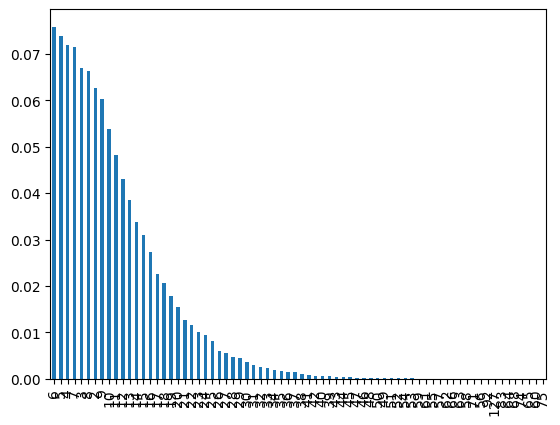

In [ ]:
purchases.purchase_list.map(lambda x: len(x)).reset_index()['purchase_list'].value_counts(normalize=True).plot(kind = 'bar')

In [ ]:
purchases.loc[purchases['purchase_list'].apply(lambda x : 13176 in x)].head(20)

,order_id,purchase_list
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
23,27,"[13176, 30442, 13646, 21019, 38226, 18479, 477..."
25,29,"[43352, 21386, 13176, 8571, 33768]"
28,32,"[12384, 15991, 13176, 20995, 18362, 35887, 496..."
35,42,"[19887, 33000, 13176]"
47,55,"[42736, 8671, 17872, 5876, 27966, 13176, 8251,..."
50,58,"[23375, 2825, 22825, 13176, 26604, 42265]"
52,60,"[9934, 22395, 36929, 37110, 13176, 37646, 2796..."
59,67,"[13176, 11422, 27514, 46654, 47993, 5438, 4622..."
75,83,"[13176, 1087, 35503, 4945, 40587, 11574, 37935..."


In [32]:
# Look at how others are using mlxtend in github